In [199]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
label = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[0]
image = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
original_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\NDTRAIN.npy", allow_pickle=True)[0]
og_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\rendered.npz", allow_pickle=True)
#print(label)
#print(len(label))
data_params = ['reward', 'observation$compassAngle', 'observation$inventory$dirt', 'action$forward', 'action$left', 'action$back', 'action$right', 'action$jump', 'action$sneak', 'action$sprint', 'action$attack', 'action$camera', 'action$place']

print([len(og_label[i]) for i in data_params[3:]])
print(label.shape)
print(label)
actual_frames = len(og_label["reward"])
#image = image[-actual_frames:]
print(image.shape)


file_names = [folder_name for folder_name in os.listdir(path+"\\MineRLNavigateDense-v0")]

train_data = file_names[:1000]
#train_data = file_names[:2]
valid_data = file_names[1000:1900]

#idx = 0

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size):
        self.batch_size = batch_size
        self.data = data
        self.video_file_no = 0
        self.video_frame_no = batch_size

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
    
    '''def __next__(self):
        return self.getitem()'''

    def __getitem__(self, idx):
        #batch_x = self.data[idx * self.batch_size : (idx+1) * self.batch_size]
        video = self.data[self.video_file_no]
        
        image_part = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[0]])
        label_part = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[1]])[0]
        label_part_2 = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[1]])[0]
        print(label_part_2.shape)
        
        print(image_part.shape)
        no_of_frames = int(np.array(image_part[0]).shape[0]/12288)
        image_part = np.array(image_part[0]).reshape(no_of_frames, 64, 64, 3)[-label_part[0].shape[0]:]
        image_part = np.asarray(image_part[idx * self.batch_size : (idx+1) * self.batch_size]).astype("float32")
        image_part = image_part.reshape(-1, 64, 64, 3)
        plt.imshow(np.array(image_part).astype(np.uint8)[-1])
        plt.show()
        
        #observations
        x_label = label_part_2[:3]
        #actions
        y_label = label_part_2[3:]
        
        #compass angle
        x_label[1] = x_label[1]/180
        #rewards without the last frame
        x_label[0] = x_label[0][:-1]
        #objects placed
        x_label[2] = x_label[2]/64
        
        #camera action
        y_label[-2] = y_label[-2]/180
        
        for each in range(len(y_label[-1])):
            checking = y_label[-1][each]
            if checking == "none":
                y_label[-1][each] = 0
            else:
                y_label[-1][each] = 1
        
        camera_x = []
        camera_y = []
        
        for j in range(len(y_label[-2])):
            camera_x.append(y_label[-2][j][0])
            camera_y.append(y_label[-2][j][1])
        
        place = y_label[-1]
        y_label = y_label[:-2]
        final_array = []
        final_x = []
        
        for x in y_label:
            final_array.append(x)
            
        final_array.append(np.array(camera_x))
        final_array.append(np.array(camera_y))
        final_array.append(place)
        
        print(np.array(image_part).dtype)
        print(np.array(image_part).shape)
        #print(np.array([image_part, label_part]).shape)
        for x in range(len(final_array[-1])):
            final_array[-1][x] = int(x)
        
        for i in range(len(final_array)):
            final_array[i] = final_array[i][self.video_frame_no]
            print(final_array[i])
        
        
        for i in range(len(x_label)):
            x_label[i] = x_label[i][self.video_frame_no]
            print(x_label[i])
        
        final_array[-1] = int(final_array[-1])
        self.video_frame_no += batch_size
        if self.video_frame_no > no_of_frames and len(self.data) != self.video_file_no:
            self.video_file_no += 1
        
        print(np.array(image_part).shape)
        print(np.array(final_array).shape)
        print(np.array(x_label).shape)
        print(np.asarray(x_label).shape)
        print("reached the end")
        return [np.asarray(image_part).astype(np.float32), np.asarray(x_label).astype(np.float32).reshape(-1,3)], np.asarray(final_array).astype(np.float32).reshape(-1,11)
    
batch_size = 1

training_gen = DataGenerator(train_data, batch_size)
valid_gen = DataGenerator(valid_data, batch_size)

[1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792]
(16129,)
[0 0 0 ... 0 0 0]
(1832, 64, 64, 3)


In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import tensorflow as tf
import tqdm
import os

(None, 3)
(None, 102400)
outputs Tensor("gru_83/Identity:0", shape=(None, 1, 11), dtype=float32)
(13,)
(1, 22511616)


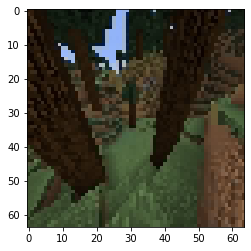

float32
(1, 64, 64, 3)
1
0
0
0
0
0
1
0
0.0
0.0
888
0.27933735
0.011816978000000075
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
(13,)
(1, 22511616)


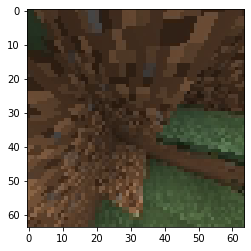

float32
(1, 64, 64, 3)
1
0
0
0
0
0
1
0
0.0
0.0
889
0.27989542
0.011893033999999938
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
(13,)
(1, 22511616)
 1/25 [>.............................] - ETA: 0s - loss: 14328.9863 - accuracy: 0.0000e+00

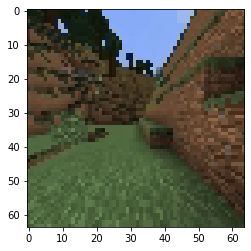

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
890
0.2739886
0.011975287999999928
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 2/25 [=>............................] - ETA: 2s - loss: 8302.4600 - accuracy: 0.0000e+00 (13,)
(1, 22511616)


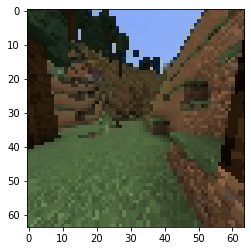

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
891
0.24348153
0.012050152000000007
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 3/25 [==>...........................] - ETA: 11s - loss: 5988.9321 - accuracy: 0.0000e+00(13,)
(1, 22511616)


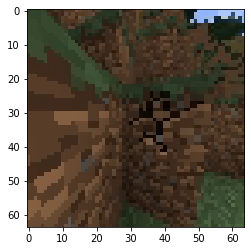

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
892
0.22921944
0.012101888600000008
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 4/25 [===>..........................] - ETA: 14s - loss: 4579.5166 - accuracy: 0.0000e+00(13,)
(1, 22511616)


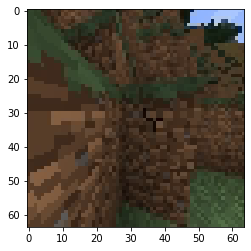

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
893
0.22543372
0.012115239999999972
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 5/25 [=====>........................] - ETA: 16s - loss: 6546.1362 - accuracy: 0.2000    (13,)
(1, 22511616)


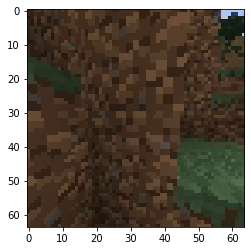

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
894
0.21965478
0.012077093199999922
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 6/25 [======>.......................] - ETA: 17s - loss: 7859.9048 - accuracy: 0.3333(13,)
(1, 22511616)


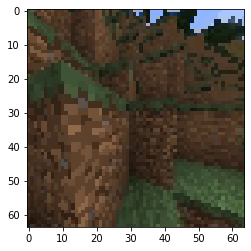

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
895
0.22850734
0.011976718999999985
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 7/25 [=======>......................] - ETA: 17s - loss: 8800.7158 - accuracy: 0.2857(13,)
(1, 22511616)


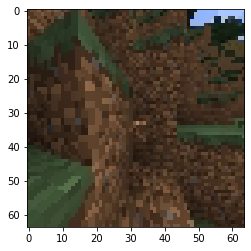

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
896
0.22846378
0.011798619999999952
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 8/25 [========>.....................] - ETA: 17s - loss: 9508.1797 - accuracy: 0.3750(13,)
(1, 22511616)


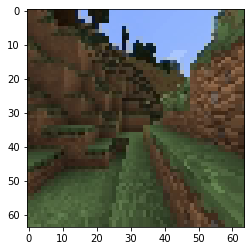

float32
(1, 64, 64, 3)
1
0
0
0
0
0
1
0
0.0
0.0
897
0.23556727
0.011527776800000014
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 9/25 [=========>....................] - ETA: 16s - loss: 10060.0830 - accuracy: 0.4444(13,)
(1, 22511616)


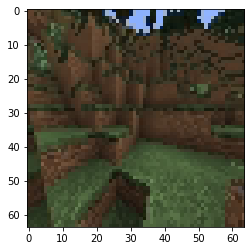

float32
(1, 64, 64, 3)
1
0
0
0
0
0
1
0
0.0
0.0
898
0.24426001
0.011163473200000043
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
10/25 [===========>..................] - ETA: 16s - loss: 10503.1973 - accuracy: 0.4000(13,)
(1, 22511616)


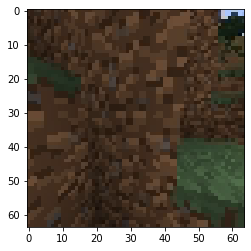

float32
(1, 64, 64, 3)
1
0
0
0
0
0
1
0
0.0
0.0
899
0.25219285
0.010720491399999964
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
11/25 [============>.................] - ETA: 15s - loss: 10867.2100 - accuracy: 0.3636(13,)
(1, 22511616)


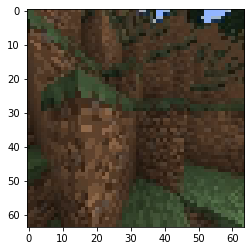

float32
(1, 64, 64, 3)
1
0
0
0
0
0
1
0
0.0
0.0
900
0.25870064
0.010226011199999933
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
12/25 [=============>................] - ETA: 14s - loss: 11171.8975 - accuracy: 0.3333(13,)
(1, 22511616)


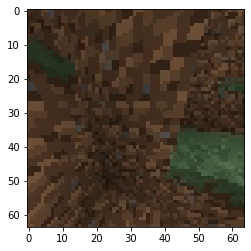

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
901
0.25317863
0.009712219200000049
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
13/25 [==============>...............] - ETA: 13s - loss: 11431.0312 - accuracy: 0.3077(13,)
(1, 22511616)


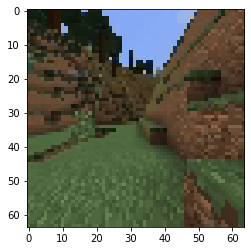

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
902
0.24399966
0.009202242000000006
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
14/25 [===============>..............] - ETA: 12s - loss: 11654.2646 - accuracy: 0.3571(13,)
(1, 22511616)


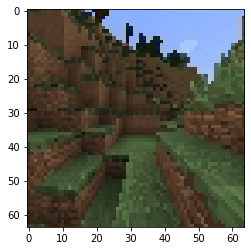

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
903
0.23478563
0.008704424000000049
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
15/25 [=================>............] - ETA: 11s - loss: 11847.9727 - accuracy: 0.3333(13,)
(1, 22511616)


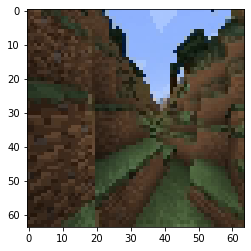

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
904
0.22683182
0.008216619400000033
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
16/25 [==================>...........] - ETA: 10s - loss: 12018.4717 - accuracy: 0.3125(13,)
(1, 22511616)


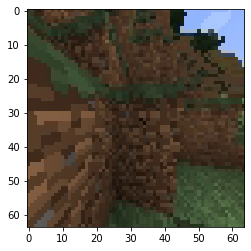

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
905
0.2204952
0.007727861400000001
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
17/25 [===================>..........] - ETA: 9s - loss: 12169.8555 - accuracy: 0.2941 (13,)
(1, 22511616)


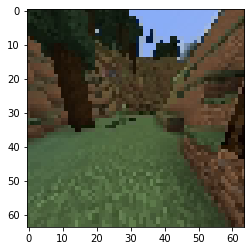

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
906
0.21556503
0.007223605999999923
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
18/25 [====================>.........] - ETA: 8s - loss: 12306.0068 - accuracy: 0.3333(13,)
(1, 22511616)


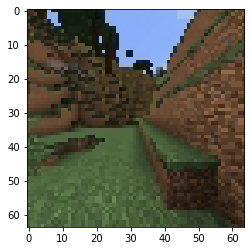

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
907
0.21182774
0.006688356400000039
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
19/25 [=====================>........] - ETA: 7s - loss: 12428.6719 - accuracy: 0.3684(13,)
(1, 22511616)


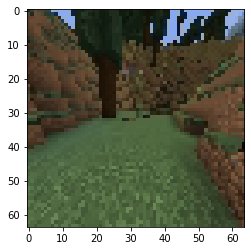

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
908
0.20897481
0.006108999200000021
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
20/25 [=======================>......] - ETA: 6s - loss: 12539.8730 - accuracy: 0.4000(13,)
(1, 22511616)


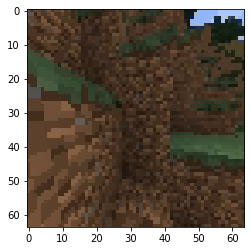

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
909
0.20677693
0.005475759600000016
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
21/25 [========================>.....] - ETA: 5s - loss: 12640.6504 - accuracy: 0.3810(13,)
(1, 22511616)


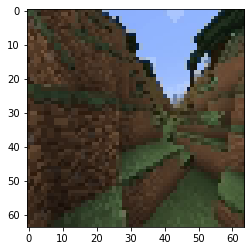

float32
(1, 64, 64, 3)
1
0
0
1
0
0
1
0
0.0
0.0
910
0.20504867
0.004783153600000074
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
22/25 [=========================>....] - ETA: 4s - loss: 12732.9961 - accuracy: 0.3636(13,)
(1, 22511616)


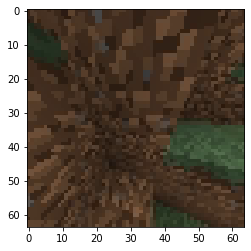

float32
(1, 64, 64, 3)
1
0
0
0
0
0
1
0
0.0
0.0
911
0.21496889
0.00402975079999995
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
23/25 [==========================>...] - ETA: 3s - loss: 12817.9482 - accuracy: 0.3478(13,)
(1, 22511616)


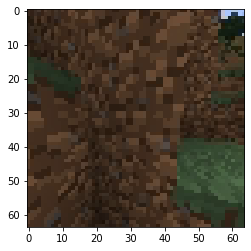

float32
(1, 64, 64, 3)
1
0
0
0
0
0
1
0
0.0
0.0
912
0.2274148
0.003229856399999973
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
24/25 [===========================>..] - ETA: 1s - loss: 12896.4912 - accuracy: 0.3333(13,)
(1, 22511616)


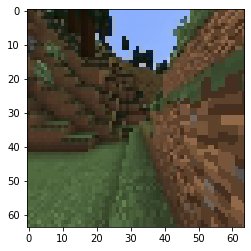

float32
(1, 64, 64, 3)
1
0
0
0
0
0
1
0
0.0
0.0
913
0.23925437
0.0024099350000000184
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
25/25 [==============================] - 41s 2s/step - loss: 12969.3916 - accuracy: 0.3200
(13,)
(1, 22511616)


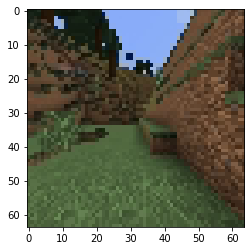

float32
(1, 64, 64, 3)
1
0
0
0
0
0
1
0
0.0
0.0
914
0.24907035
0.0016050338799999508
0.0
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end


In [244]:
input_1 = tf.keras.layers.Input(shape=[64,64,3])
input_2 = tf.keras.layers.Input(shape=[3])
print(input_2.shape)
input_2_p = tf.reshape(input_2, [-1, 1, 3])

conv_1 = tf.keras.layers.Conv2D(25, 3, activation="relu", padding="same")(input_1)
flatten = tf.keras.layers.Flatten()(conv_1)
print(flatten.shape)
flatten_p = tf.reshape(flatten, [-1, 1, 102400])

dense_and_stats = tf.keras.layers.concatenate([flatten_p, input_2_p])
gru_1 = tf.keras.layers.GRU(25, return_sequences=True)(dense_and_stats)
#gru_2 = tf.keras.layers.GRU(25, return_sequences=True)(gru_1)
outputs = tf.keras.layers.GRU(11, return_sequences=True)(gru_1)

print("outputs", outputs)

model = tf.keras.Model(inputs=[input_1, input_2], outputs=[tf.reshape(outputs, [-1, 11])])
    
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics="accuracy")

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience = 3)

model.fit_generator(generator = training_gen,
                    steps_per_epoch = 25,
                    epochs = 1,
                    verbose = 1,
                    callbacks = early_stopping,
                    validation_data = valid_gen,
                    validation_steps = 5)
